In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df_fam_escolaridade = pd.read_csv('./df_fam_escolaridade.csv')

In [3]:
df_fam_escolaridade.head()

,cd_ibge,uf_ibge,regiao_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,...,qtd_freq_publica,freq_publica,qtd_freq_particular,freq_particular,qtd_nunca_freq_escola,nunca_freq_escola,qtd_adultos_nunca_freq_escola,adultos_nunca_freq_escola,ideb_2017_municipio,ideb_ausente
0,4212908,42,4,1,2,268503,60.0,1.0,1.0,5.0,...,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,6.3,0
1,2931905,29,2,2,3,2888440,0.0,2.0,1.0,2.0,...,1.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,5.1,0
2,3527207,35,3,2,3,2113517,713.0,1.0,1.0,5.0,...,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,5.7,0
3,3303500,33,3,2,2,4419096,50.0,1.0,1.0,3.0,...,0.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0,4.7,0
4,2800308,28,2,2,1,4241219,90.0,1.0,1.0,4.0,...,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,4.6,0


In [4]:
df_fam_escolaridade = df_fam_escolaridade.drop(['vlr_renda_media_fam', 'cd_ibge', 'id_familia', 'peso.fam'], axis=1)

In [5]:
df_fam_escolaridade.columns

Index(['uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'qtd_n_alfabetizado_10anos',
       'n_alfabetizado_10anos', 'qtd_n_freq_escola', 'n_freq_escola',
       'qtd_freq_publica', 'freq_publica', 'qtd_freq_particular',
       'freq_particular', 'qtd_nunca_freq_escola', 'nunca_freq_escola',
       'qtd_adultos_nunca_freq_escola', 'adultos_nunca_freq_escola',
       'ideb_2017_municipio', 'ideb_ausente'],
      dtype='object')

In [6]:
mask_fam = np.triu(np.ones_like(df_fam_escolaridade.corr(), dtype=bool), k=1)

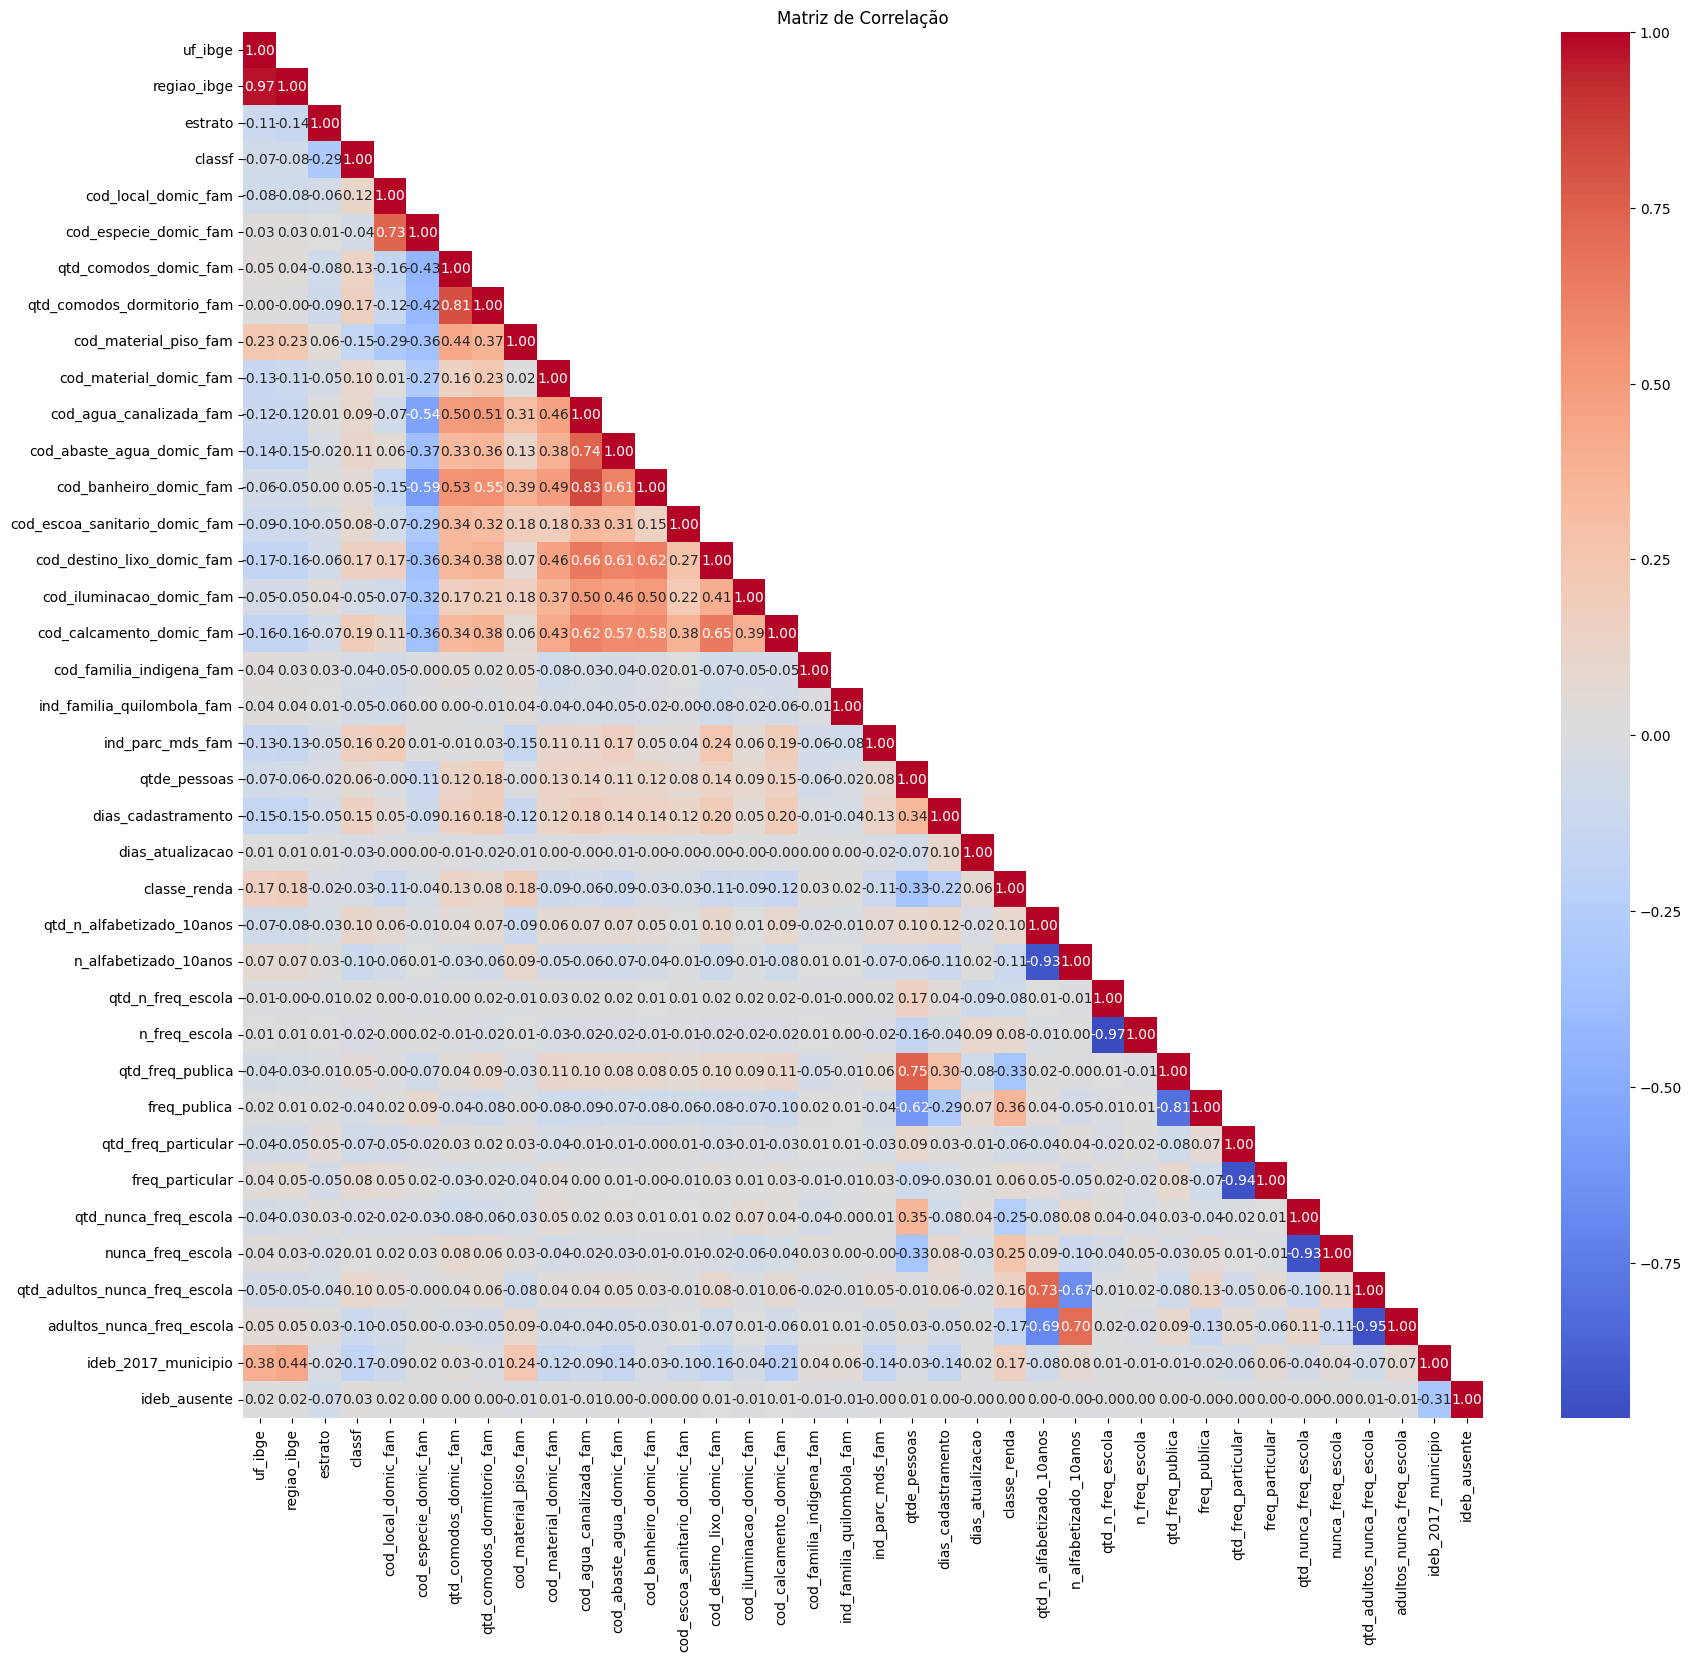

In [7]:
plt.figure(figsize=(20, 18))
sns.heatmap(df_fam_escolaridade.corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask_fam)
plt.title('Matriz de Correlação')
plt.show()

In [8]:
def reg_log(X_train, X_test, y_train, y_test):
    reg_log = LogisticRegression(solver='liblinear', max_iter=300)
    reg_log.fit(X_train, y_train)
    print(f'Score do reg log: {reg_log.score(X_test, y_test)}')
    print(f"Score do reg log balanceado: {metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')}")
    
    fig, ax = plt.subplots(figsize=(5, 5))
    cm_display = ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format='d')
    cm_display.ax_.set_title('Matriz de Confusão Reg Log Binário')
    plt.show()

In [9]:
def arvore_decisao(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
    print(f'Score da árvore de decisão: {clf.score(X_test, y_test)}')
    print(f"Score da árvore de decisão balanceado: {metrics.f1_score(y_test, clf.predict(X_test), average='weighted')}")
    
    fig, ax = plt.subplots(figsize=(5, 5))
    cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, values_format='d')
    cm_display.ax_.set_title('Matriz de Confusão Árvore de decisão')
    plt.show()   

In [10]:
def random_forest(X_train, X_test, y_train, y_test):
    rf_class = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100).fit(X_train, y_train)
    print(f'Score da random forest: {rf_class.score(X_test, y_test)}')    
    print(f"Score da árvore de decisão balanceado: {metrics.f1_score(y_test, rf_class.predict(X_test), average='weighted')}")
    
    fig, ax = plt.subplots(figsize=(5, 5))
    cm_display = ConfusionMatrixDisplay.from_estimator(rf_class, X_test, y_test, ax=ax, values_format='d')
    cm_display.ax_.set_title('Matriz de Confusão Random Forest')
    plt.show()

### Teste de modelos com os dados de escolaridade em formato binário

In [11]:
# Criar um dataframe apenas com os valores binários (tem ou não tem pessoas relacionadas à variável)
df_fam_escolaridade_bin = df_fam_escolaridade.drop(['qtd_n_alfabetizado_10anos', 'qtd_n_freq_escola',
                                                    'qtd_freq_publica', 'qtd_freq_particular',
                                                    'qtd_nunca_freq_escola', 'qtd_adultos_nunca_freq_escola'], axis=1)

In [13]:
X_bin = df_fam_escolaridade_bin.drop(columns=['classe_renda'])
y_bin = df_fam_escolaridade_bin.classe_renda

In [14]:
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=41)

Score do reg log: 0.6652505051551733
Score do reg log balanceado: 0.6063197776210351


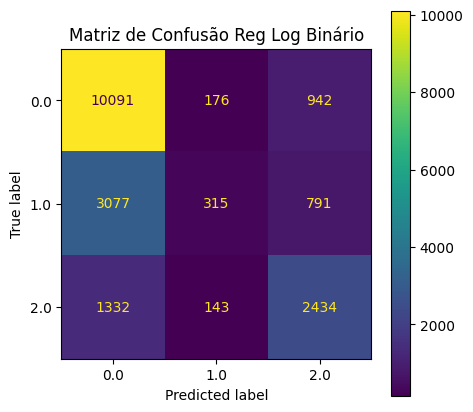

In [15]:
reg_log(X_bin_train, X_bin_test, y_bin_train, y_bin_test)

Score da árvore de decisão: 0.6415211647064919
Score da árvore de decisão balanceado: 0.5613175284466859


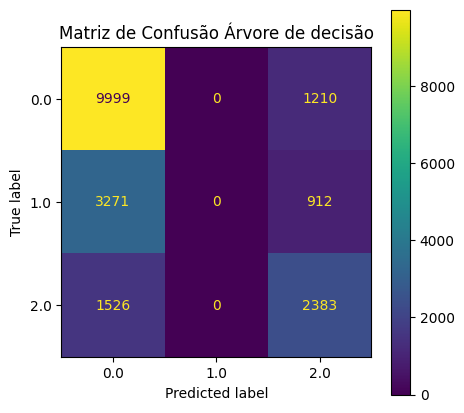

In [16]:
arvore_decisao(X_bin_train, X_bin_test, y_bin_train, y_bin_test)

Score da random forest: 0.6522459976167038
Score da árvore de decisão balanceado: 0.5665418982968821


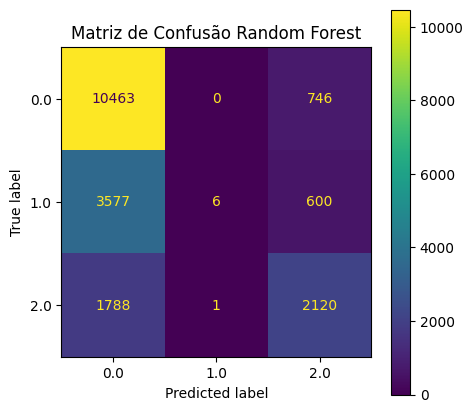

In [17]:
random_forest(X_bin_train, X_bin_test, y_bin_train, y_bin_test)

### Teste de modelos com os dados de escolaridade em formato de quantidade absoluta

In [18]:
# Criar um dataframe apenas com os valores absolutos de quantidade de pessoas na família relacionadas à variável
df_fam_escolaridade_abs = df_fam_escolaridade.drop(['n_alfabetizado_10anos', 'n_freq_escola', 
                                                    'freq_publica', 'freq_particular', 'nunca_freq_escola',
                                                    'adultos_nunca_freq_escola'], axis=1)

In [19]:
X_abs = df_fam_escolaridade_abs.drop(columns=['classe_renda'])
y_abs = df_fam_escolaridade_abs.classe_renda

In [20]:
X_abs_train, X_abs_test, y_abs_train, y_abs_test = train_test_split(X_abs, y_abs, test_size=0.2, random_state=41)

Score do reg log: 0.6732811771410808
Score do reg log balanceado: 0.6327690880338775


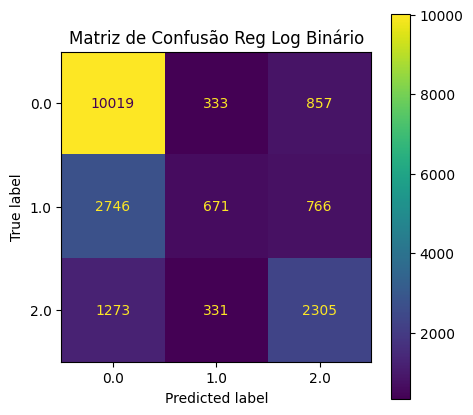

In [21]:
reg_log(X_abs_train, X_abs_test, y_abs_train, y_abs_test)

Score da árvore de decisão: 0.6415211647064919
Score da árvore de decisão balanceado: 0.5613175284466859


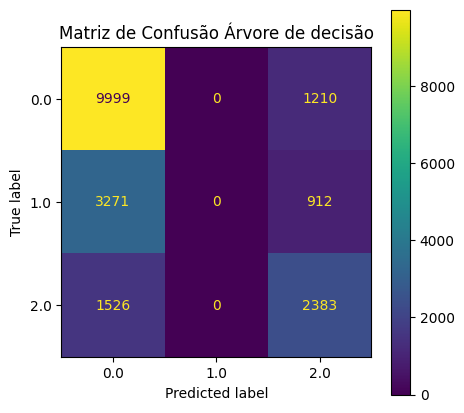

In [22]:
arvore_decisao(X_abs_train, X_abs_test, y_abs_train, y_abs_test)

Score da random forest: 0.6520387544686804
Score da árvore de decisão balanceado: 0.5663637787617203


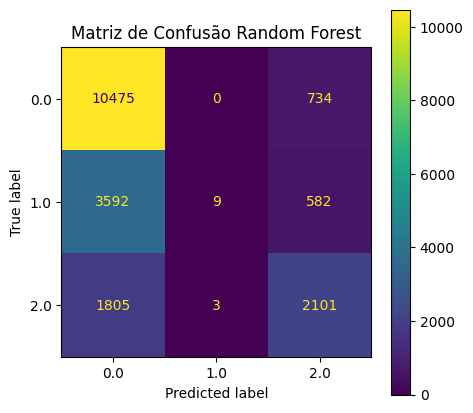

In [23]:
random_forest(X_abs_train, X_abs_test, y_abs_train, y_abs_test)

#### O modelo com melhor performance foi com a quantidade absoluta, utilizando a regressão logística